In [ ]:
This will be an Exploratory Data Analysis on a London Bus Safety dataset.

data.world [@vizwiz]. (2018). 
    2018/W51: London Bus Safety Performance [Dataset]. 
    https://data.world/makeovermonday/2018w51
        
The aim of this data exploration is to answer the following 6 questions.


1. How many unique fields are there for each variable?
2. How much null information is there in each variable?
3. Create a new variable to describe if the person was taken to hospital.
4. Do any opperators have a higher incidence of overall incidents?
5. Do any operators have a higher incident of hospitalizations?
6. Compare the 'Slip Trip Fall' count with different operators.  
    Order them by operators with most 'Slip Trip Fall's to least.  
    Which operator has the most of these incidents?


# 0 IMPORT CSV FILE TO A PANDAS DATAFRAME

In [70]:
import pandas as pd
import numpy as np



#For formatting output
BOLD = '\033[1m'
END = '\033[0m'


df = pd.read_csv("TFL Bus Safety.csv",encoding='cp1252')
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,1/1/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,1/1/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,1/1/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,1/1/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,1/1/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


# 1a. How many unique fields are there for each variable?

In [4]:
df.nunique()

Year                           4
Date Of Incident              45
Route                        612
Operator                      25
Group Name                    14
Bus Garage                    84
Borough                       35
Injury Result Description      4
Incident Event Type           10
Victim Category               17
Victims Sex                    3
Victims Age                    5
dtype: int64

## 1b.  London does not have 35 Boroughs... I know this because I googled it, so I put a list of London Boroughs in a dataframe and compared this to the 'list' of Boroughs in this dataset.

In [52]:
#copy list of boroughs
dfboroughs = pd.read_csv("londonboroughlist.csv")

#remove whitespace (the copying of boroughs caused a trailing whitespace)
dfboroughs['borough'] = dfboroughs['borough'].str.strip()

#convert the dataframe to a list
dfboroughs = dfboroughs['borough'].to_list()

#List of valuses are in the dataframe['Borough'] but are not in the borough list.
nonboroughs = df['Borough'][~df['Borough'].isin(dfboroughs)].unique()


#Show what boroughs are in the dataframe that are not in the borough list.
print('Dataframe contains these non-borough fields as boroughs:\n')

for i in nonboroughs:
    print("'" + i + "''")


Dataframe contains these non-borough fields as boroughs:

'None London Borough''
'City of London''
'Not specified''


## 1c. Examine unique values on select values to understand what may be categorical, then view unique values on all variables.

The exhaustive view of this will help us to answer the following question where we must find null values.

In [63]:


examine_unique_list = ['Injury Result Description', 'Incident Event Type', 'Victim Category','Victims Sex', 'Victims Age']

print('Examining a few variables unique values:\n\n')

for i in examine_unique_list:
    print(BOLD + i.upper() + ':' + END)
    print(*df[i].unique(), sep = '\n')
    print('\n')
    

Examining a few variables unique values:


INJURY RESULT DESCRIPTION:
Injuries treated on scene
Taken to Hospital – Reported Serious Injury or Severity Unknown
Reported Minor Injury - Treated at Hospital
Fatal


INCIDENT EVENT TYPE:
Onboard Injuries
Collision Incident
Assault
Vandalism Hooliganism
Safety Critical Failure
Personal Injury
Slip Trip Fall
Activity Incident Event
Fire
Robbery


VICTIM CATEGORY:
Passenger
Pedestrian
Conductor
Bus Driver
Member Of Public
Cyclist
Motorcyclist
3rd Party driver / Occupant
Other
Non-Operational Staff
Operational Staff
Contractor Staff
TfL Staff
Operations staff (other)
Cyclist 
Motorcyclist 
Insufficient Data


VICTIMS SEX:
Male
Female
Unknown


VICTIMS AGE:
Child
Unknown
Elderly
Adult
Youth




In [68]:
#View unique values for all variables
print('An exhaustive view of each variables unique values:\n\n')

for i in list(df):
    print(BOLD + i.upper() + ':\n' + END)
    print(df[i].unique())
    print('\n')

An exhaustive view of each variables unique values:


YEAR:

[2015 2016 2017 2018]


DATE OF INCIDENT:

['1/1/2015' '4/1/2015' '5/1/2015' '6/1/2015' '2/1/2015' '3/1/2015'
 '7/1/2015' '8/1/2015' '9/1/2015' '10/1/2015' '11/1/2015' '12/1/2015'
 '1/1/2016' '10/1/2016' '11/1/2016' '12/1/2016' '4/1/2016' '5/1/2016'
 '6/1/2016' '7/1/2016' '8/1/2016' '9/1/2016' '2/1/2016' '3/1/2016'
 '1/1/2017' '2/1/2017' '3/1/2017' '4/1/2017' '5/1/2017' '6/1/2017'
 '7/1/2017' '8/1/2017' '9/1/2017' '10/1/2017' '11/1/2017' '12/1/2017'
 '1/1/2018' '2/1/2018' '3/1/2018' '4/1/2018' '5/1/2018' '6/1/2018'
 '7/1/2018' '8/1/2018' '9/1/2018']


ROUTE:

['1' '4' '5' '6' '8' '9' '10' '11' '12' '14' '16' '17' '18' '21' '22' '23'
 '24' '25' '27' '29' '31' '32' '33' '34' '35' '37' '38' '43' '44' '45'
 '47' '49' '50' '51' '52' '57' '59' '60' '61' '63' '67' '68' '71' '73'
 '74' '76' '77' '79' '81' '83' '85' '88' '89' '90' '91' '93' '94' '95'
 '96' '97' '102' '104' '106' '109' '111' '115' '118' '121' '123' '125'
 '131' '134' '

# 2a. How much null information is there in each variable?


In [74]:
'''Using the output above, find out how null is reported on each column, we will
use a dictionary to map the column with how null is reported.'''

column_null_dictionary = {
    'Route': '(blank)', 
    'Bus Garage': 'Garage Not Available',
    'Borough': 'Not specified', 
    'Victim Category': 'Insufficient Data',
    'Victims Sex': 'Unknown',
    'Victims Age': 'Unknown'
}


print("NULL COUNTS\n")

#Calculate row count of dataframe this is used for percent calculations
row_count = df.shape[0]


'''Iterate through the dictonary and replace values with NaN
and report nulls as we go'''

for x, y in column_null_dictionary.items():
    #Replace the column values with null where appropriate
    df[x].replace(y, np.nan, inplace=True)
    
    #Set null_count
    null_count = df[x].isna().sum()
    null_count_percent = round(((null_count / row_count)*100),2)
    
    #Count and report the nulls
    print(BOLD + x + ':' + END + '\n' + str(null_count) + ' / ' + str(row_count))
    
    #Report percent
    print(str(null_count_percent)  + '%' + '\n')

NULL COUNTS

Route:
14 / 23158
0.06%

Bus Garage:
8572 / 23158
37.02%

Borough:
553 / 23158
2.39%

Victim Category:
2 / 23158
0.01%

Victims Sex:
3602 / 23158
15.55%

Victims Age:
7135 / 23158
30.81%



In [76]:
#Report on all variables as a 'sanity check'
df.isna().sum()

Year                            0
Date Of Incident                0
Route                          14
Operator                        0
Group Name                      0
Bus Garage                   8572
Borough                       553
Injury Result Description       0
Incident Event Type             0
Victim Category                 2
Victims Sex                  3602
Victims Age                  7135
dtype: int64

## 2b Visualize missingness
I will use the missingno library to output a missing matrix.

<AxesSubplot:>

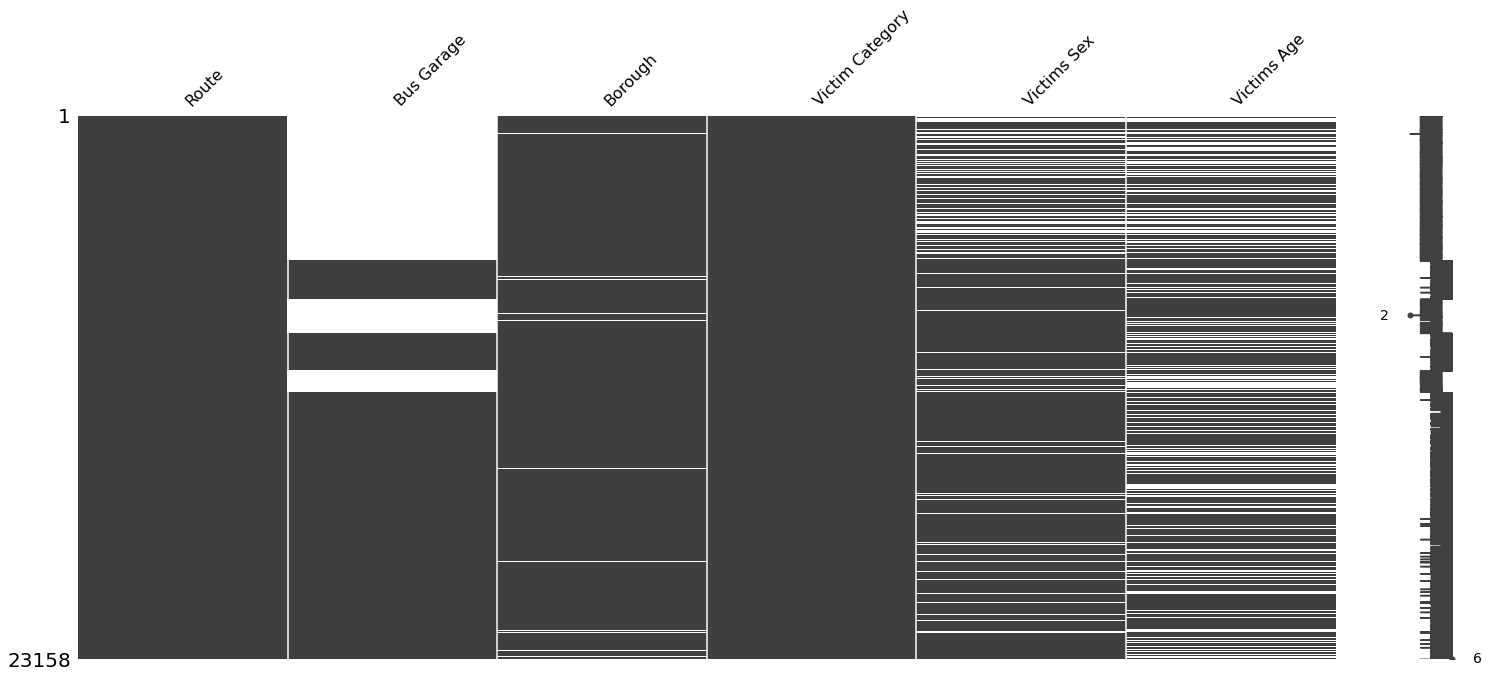

In [77]:
import missingno as msno 

#only report missing numbers on data with missing values
msno.matrix(df[list(column_null_dictionary.keys())]) 

Zooming in on the last 250 records out of 23158 records


<AxesSubplot:>

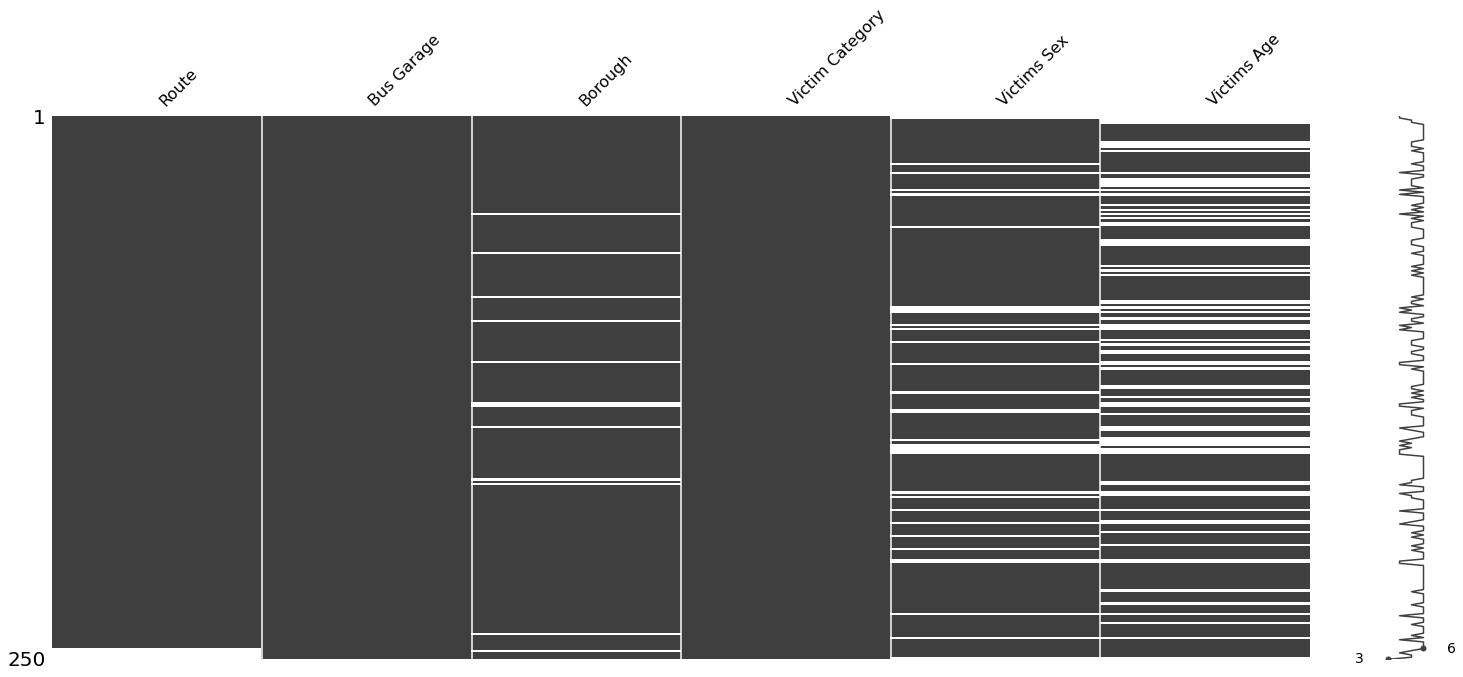

In [81]:
'''I zoom into the last 250 records (the help function of msno notes
that 250 rows are optimal) to get a peek at the missingness at the end'''

print("Zooming in on the last 250 records out of " + str(df.shape[0]) + ' records')
import missingno as msno 
msno.matrix(df[list(column_null_dictionary.keys())].tail(250)) 



# 3 Create a new variable to describe if the person was taken to hospital.

In [93]:
#If the Injury Result Description has the string 'Hospital' create bool T/F
df['Hospitalized'] = df['Injury Result Description'].str.contains('Hospital')

#Convert bool T/F into yes/no responses
df['HospitalizedYN'] = df['Hospitalized'].replace({
    True: "Yes",
    False: "No"
})

'''A column with true and false values is kept for future aggregations,
this is with the hindsight of proofreading, originally I converted it back 
to boolean to do the aggregations'''

print('View of the new variables\n')
print(df['HospitalizedYN'].head())
print('\n')
print(df['Hospitalized'].head())

View of the new variables

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: HospitalizedYN, dtype: object


0    False
1    False
2     True
3     True
4     True
Name: Hospitalized, dtype: bool


# 4. Do any opperators have a higher incidence of overall incidents?

In [99]:
'''Create new Dataframe with all the operators.  Operator is needed, 
the other column is just to tranform into count column'''

#New DF
operator_incidents = df[['Operator']].copy()

#Create a new column in new dataframe
operator_incidents['Count'] = 1


#Value check for above code (maybe thorough, maybe noob stuff IDK)
print(operator_incidents)
print('\nCheck to make sure sum of count = the # of rows above')
print(operator_incidents['Count'].sum())

             Operator  Count
0      London General      1
1           Metroline      1
2         East London      1
3         East London      1
4           Metroline      1
...               ...    ...
23153     East London      1
23154   London United      1
23155   London United      1
23156   London United      1
23157       Metroline      1

[23158 rows x 2 columns]

Check to make sure sum of count = the # of rows above
23158


In [100]:
#Use an aggregate function and the sum of the new 'Count' variable

operator_incidents = operator_incidents.groupby(['Operator'], as_index=False).agg(incident_count = ('Count', 'sum'))

operator_incidents.sort_values(by=['incident_count'], ascending=False)


,Operator,incident_count
16,Metroline,3457
3,Arriva London North,3208
9,East London,2402
14,London United,2263
19,Selkent,1808
4,Arriva London South,1743
12,London General,1723
11,London Central,1367
17,Metroline West,1232
0,Abellio London,963


# 5. Do any operators have a higher incident of hospitalizations?

Fairly straightforward because we have already created a field for hospitalized, let's aggregate that, and use Seaborn to plot it.

In [104]:
#Aggregate the count of hospitilizations 
operator_hospitalizations = df.groupby(['Operator'], as_index=False).agg(hospitalized_count = ('Hospitalized', 'sum'))

#Sort values by hospitalizations descending
operator_hospitalizations = operator_hospitalizations.sort_values(by=['hospitalized_count'], ascending=False)

#Display
operator_hospitalizations

,Operator,hospitalized_count
16,Metroline,840
3,Arriva London North,781
12,London General,519
14,London United,509
9,East London,448
11,London Central,422
4,Arriva London South,384
0,Abellio London,359
19,Selkent,319
17,Metroline West,312


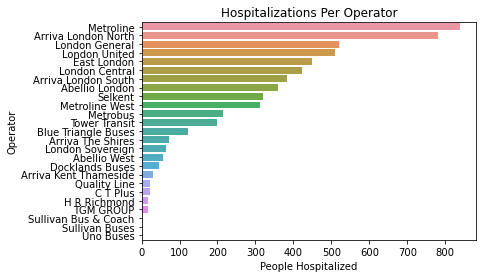

In [123]:
#Add a visualization

import seaborn as sns
import matplotlib.pyplot as plt

operator_hospitalizations_chart = sns.barplot(
    x= operator_hospitalizations['hospitalized_count'], 
    y = operator_hospitalizations['Operator']
    )

operator_hospitalizations_chart.set_title('Hospitalizations Per Operator')
operator_hospitalizations_chart.set_xlabel('People Hospitalized')

plt.show()

# 6. Compare the slip trip fall count (in incident event type) with different operators.  Order them by operators with most slip trip falls to least.



In [125]:
#search for Slip Trip Fall in 'Incident Event Type'

df['SlipTripFall'] = df['Incident Event Type'].str.contains('Slip Trip Fall')
#Confirm that the string is found (if so there will be two unique values,

operator_tripslipfall = df.groupby(['Operator'], as_index=False).agg(SlipTripFallCount = ('SlipTripFall', 'sum'))

operator_tripslipfall = operator_tripslipfall.sort_values(by=['SlipTripFallCount'], ascending=False)

operator_tripslipfall

,Operator,SlipTripFallCount
3,Arriva London North,1277
16,Metroline,828
14,London United,719
4,Arriva London South,687
19,Selkent,536
12,London General,520
9,East London,501
11,London Central,459
0,Abellio London,302
17,Metroline West,299


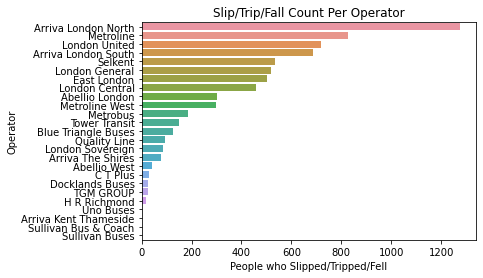

The Operator with the most Slip/Trip/Fall incidents is:

Arriva London North


In [127]:
import seaborn as sns

sns.barplot(
    x= operator_tripslipfall['SlipTripFallCount'], 
    y = operator_tripslipfall['Operator']
    )


#Add a visualization

import seaborn as sns
import matplotlib.pyplot as plt

operator_tripslipfall_chart = sns.barplot(
    x= operator_tripslipfall['SlipTripFallCount'], 
    y = operator_tripslipfall['Operator']
    )

operator_tripslipfall_chart.set_title('Slip/Trip/Fall Count Per Operator')
operator_tripslipfall_chart.set_xlabel('People who Slipped/Tripped/Fell')

plt.show()



###ANSWER THE QUESTION

print('The Operator with the most Slip/Trip/Fall incidents is:\n\n' 
      + BOLD + operator_tripslipfall['Operator'].iloc[0] + END)

